In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [25]:
df = pd.read_csv('S05-hw-dataset.csv')
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [27]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [28]:
df.value_counts(normalize=True)

client_id  age  income  years_employed  credit_score  debt_to_income  num_credit_cards  num_late_payments  has_mortgage  has_car_loan  savings_balance  checking_balance  region_risk_score  phone_calls_to_support_last_3m  active_loans  customer_tenure_years  default
1          25   94074   22              839           0.547339        1                 7                  0             0             26057             5229             0.080052           19                              1             8                      0          0.000333
2          58   51884   26              565           0.290882        1                 1                  0             1             16221             11595            0.428311           15                              0             7                      0          0.000333
3          53   48656   39              561           0.522340        1                 13                 0             0             55448            -2947             0.770883

Всего 3000 обьектов, 17 признаков. Пропусков нет, аномалий в целом тоже

In [30]:
X = df.drop(['client_id', 'default'], axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify= y, random_state=42)
baseline_model = DummyClassifier(strategy="most_frequent", random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
y_pred_proba_baseline = baseline_model.predict_proba(X_test)

#проверка с accuracy
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
#проверка с roc
roc_auc_baseline = roc_auc_score(y_test, y_pred_proba_baseline[:, 1])
print(f'Точность - {accuracy_baseline}\nВероятность предсказания - {roc_auc_baseline}')

Точность - 0.5893333333333334
Вероятность предсказания - 0.5


Бейзлайн нужен для сравнения с моделью. Поскольку он является наивным методом обучения, модель должна превосходить его по характеристикам, иначе ее использования не релевантно

In [31]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)

y_pred_logreg = pipe.predict(X_test)
y_pred_proba_logreg = pipe.predict_proba(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg[:, 1])

print(f'Точность - {accuracy_logreg:.4f}')
print(f'ROC-AUC - {roc_auc_logreg:.4f}')


grid = GridSearchCV(pipe, {'logreg__C': [0.01, 0.1, 1, 10]}, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(f'Лучший параметр C: {grid.best_params_}')

y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best[:, 1])
print(f'Точность - {accuracy_best:.4f}')
print(f'ROC-AUC - {roc_auc_best:.4f}')

Точность - 0.7933
ROC-AUC - 0.8647
Лучший параметр C: {'logreg__C': 0.01}
Точность - 0.7973
ROC-AUC - 0.8643


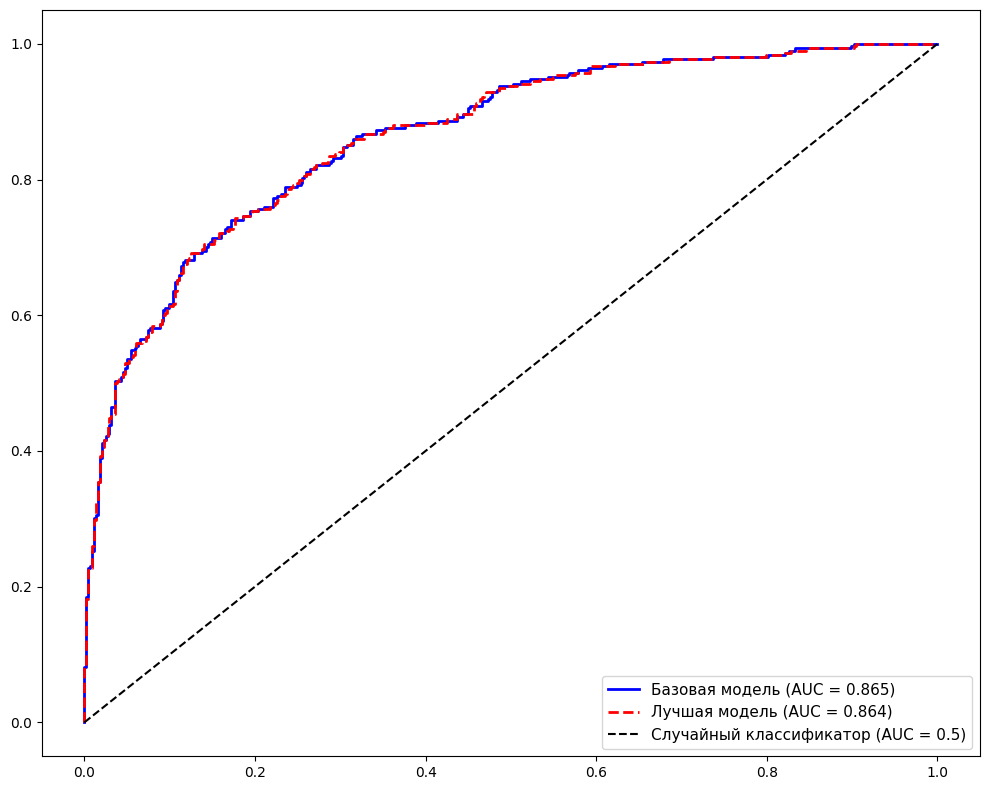

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg[:, 1])
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best[:, 1])

roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, color='blue',label=f'Базовая модель (AUC = {roc_auc_logreg:.3f})', linewidth=2)
plt.plot(fpr_best, tpr_best, color='red',label=f'Лучшая модель (AUC = {roc_auc_best:.3f})', linewidth=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор (AUC = 0.5)')
plt.legend(loc='lower right', fontsize=11)
plt.savefig('figures/roc.png')

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({
    'Модель': ['Базовый классификатор', 'Логистическая регрессия (C=1)', f'Логистическая регрессия (C={grid.best_params_["logreg__C"]})'],
    'Accuracy': [accuracy_baseline, accuracy_logreg, accuracy_best],
    'ROC-AUC': [roc_auc_baseline, roc_auc_logreg, roc_auc_best],
    'Параметр C': ['-', '1.0 (по умолчанию)', grid.best_params_['logreg__C']]
})
results_df

,Модель,Accuracy,ROC-AUC,Параметр C
0,Базовый классификатор,0.608000,0.500000,-
1,Логистическая регрессия (C=1),0.794667,0.873008,1.0 (по умолчанию)
2,Логистическая регрессия (C=0.1),0.797333,0.873023,0.1


# Отчет
Бейзлайн всегда предсказывает наиболее частый класс, в то время как логистическая регрессия строит мат. модель, учитывающую все признаки. 

----

Бейзлайн модель угадывает на уровне случайности 50/50, в то время как лог. регрессия уже лучше разделяет по классам.

----
Изменение регуляризации модели(в данном случае) не сильно улучшает результат, но при разных значениях есть вероятность переобучения.

-----

Для данной задачи наилучшей будет лог. регрессия, потому что показывает себя куда лучше и точнее. Помимо этого, она имеет уже более осмысленные предсказания, тк модель корректно идентифицирует 79.7% клиентов и с вероятностью 0.864(ROC-AUC) ранжирует клиентов правильно.

-----

Логистическая регрессия демонстрирует превосходство над бейзлайн-моделью и является лучшим решением для предсказания кредитного дефолта. Модель показывает себя хорошо на тестовых выборках с Accuracy 79.7% и ROC-AUC 86.4%.

Подбор гиперпараметров через GridSearchCV позволил немного улучшить результаты и выбрать оптимальную силу регуляризации, что способствует лучшим результатам использования модели на новых данных в дальнейшем.